In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part A: College Readiness

## Data Processing

In [2]:
# Load each year of district/district data 
sd_2010_2011 = pd.read_csv('district/district_2010-2011.csv')
sd_2011_2012 = pd.read_csv('district/district_2011-2012.csv')
sd_2012_2013 = pd.read_csv('district/district_2012-2013.csv')
sd_2013_2014 = pd.read_csv('district/district_2013-2014.csv')
sd_2014_2015 = pd.read_csv('district/district_2014-2015.csv')
sd_2015_2016 = pd.read_csv('district/district_2015-2016.csv')
sd_2016_2017 = pd.read_csv('district/district_2016-2017.csv')
sd_2017_2018 = pd.read_csv('district/district_2017-2018.csv')
sd_2018_2019 = pd.read_csv('district/district_2018-2019.csv')

In [3]:
# Add a new column for the year each entry is from
sd_2010_2011 = sd_2010_2011.assign(Year = '2010-2011')
sd_2011_2012 = sd_2011_2012.assign(Year = '2011-2012')
sd_2012_2013 = sd_2012_2013.assign(Year = '2012-2013')
sd_2013_2014 = sd_2013_2014.assign(Year = '2013-2014')
sd_2014_2015 = sd_2014_2015.assign(Year = '2014-2015')
sd_2015_2016 = sd_2015_2016.assign(Year = '2015-2016')
sd_2016_2017 = sd_2016_2017.assign(Year = '2016-2017')
sd_2017_2018 = sd_2017_2018.assign(Year = '2017-2018')
sd_2018_2019 = sd_2018_2019.assign(Year = '2018-2019')

In [4]:
# Concatenate the dataframes along axis 0 (vertically stacked by year)
sd_dfs = [sd_2010_2011, sd_2011_2012, sd_2012_2013, sd_2013_2014, sd_2014_2015, sd_2015_2016, sd_2016_2017, sd_2017_2018, sd_2018_2019]
sd_all = pd.concat(sd_dfs, axis = 0)

In [5]:
# Dataset containing all districts from each year
sd_all

,District Name,County Name (District),District Type (District),Census Day Enrollment (District),English Learners % (District),Free/Reduced Meals % (District),Ethnic Diversity Index (District),Cohort Graduates % (District),Grads Mtg UC/CSU % (District),Grads Mtg UC/CSU # (District),...,CAASPP-Math Standard Exceeded or Met (Levels 3 and 4) (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 5000-5999 Community Services Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Year
0,Calistoga Joint Unified (Napa),Napa,Unified School District,858,Not Certified,78.4,5,82.19,100,63,...,NaN,12806.0,604.0,13952.0,239.0,8543.0,31,1250.0,781.0,2010-2011
1,Death Valley Unified (Inyo),Inyo,Unified School District,51,Not Certified,84.3,28,100,redacted,redacted,...,NaN,25438.0,1733.0,27294.0,312.0,12543.0,0,4458.0,4449.0,2010-2011
2,Golden Valley Unified (Madera),Madera,Unified School District,1925,6.2,46.1,36,91.03,100,143,...,NaN,7633.0,256.0,8320.0,107.0,4329.0,0,781.0,533.0,2010-2011
3,Warner Unified (San Diego),San Diego,Unified School District,286,8.4,75.2,56,90,100,31,...,NaN,13610.0,1019.0,15644.0,56.0,7675.0,0,1998.0,2465.0,2010-2011
4,Acton-Agua Dulce Unified (Los Angeles),Los Angeles,Unified School District,1696,Not Certified,30.3,34,90,99.3,138,...,NaN,7795.0,431.0,8361.0,77.0,4778.0,0,687.0,909.0,2010-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Woodland Joint Unified (Yolo),Yolo,Unified School District,10031,23.3,60.3,32,92.3,47.7,327,...,27.89,12175.0,422.0,13128.0,92.0,7653.0,19,619.0,1296.0,2018-2019
341,Yosemite Unified (Madera),Madera,Unified School District,2060,2,48.2,36,83.8,49.3,74,...,34.89,12771.0,587.0,14195.0,83.0,6795.0,38,1157.0,1391.0,2018-2019
342,Yuba City Unified (Sutter),Sutter,Unified School District,13111,22.1,74.2,53,85.8,37.7,314,...,29.59,12987.0,793.0,13557.0,133.0,8195.0,0,679.0,1114.0,2018-2019
343,Yucaipa-Calimesa Joint Unified (San Bernardino),San Bernardino,Unified School District,9982,7.6,50.8,39,90.5,46.2,306,...,36.33,11629.0,346.0,12174.0,149.0,7204.0,0,661.0,1460.0,2018-2019


In [6]:
# Remove all districts with nan and specified string values
sd_all_cleaned = sd_all.copy()
for col in sd_all_cleaned.columns:
  sd_all_cleaned = sd_all_cleaned[~(sd_all_cleaned[col].isin(["redacted", "(1)", "Not Certified"]) | pd.isna(sd_all_cleaned[col]))]

# Average CAASPP scores in one column as target variable
english = sd_all_cleaned["CAASPP-ELA Standard Exceeded or Met (Levels 3 and 4) (District)"].astype(float)
math = sd_all_cleaned["CAASPP-Math Standard Exceeded or Met (Levels 3 and 4) (District)"].astype(float) 
sd_all_cleaned["CAASPP % Passing"] = (english + math) / 2
sd_all_cleaned

,District Name,County Name (District),District Type (District),Census Day Enrollment (District),English Learners % (District),Free/Reduced Meals % (District),Ethnic Diversity Index (District),Cohort Graduates % (District),Grads Mtg UC/CSU % (District),Grads Mtg UC/CSU # (District),...,Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 5000-5999 Community Services Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Year,CAASPP % Passing
0,ABC Unified (Los Angeles),Los Angeles,Unified School District,20768,20.8,49.3,56,91.1,58.7,910,...,10410.0,439.0,11160.0,0.0,6761.0,0,580.0,849.0,2016-2017,59.270
2,Alameda Unified (Alameda),Alameda,Unified School District,11201,16.4,28.6,69,87,59,461,...,11570.0,540.0,11919.0,200.0,7634.0,14,727.0,875.0,2016-2017,62.050
3,Albany City Unified (Alameda),Alameda,Unified School District,3702,18.2,17.3,60,91.9,62,176,...,12165.0,405.0,12649.0,124.0,7952.0,116,1031.0,559.0,2016-2017,76.625
4,Alhambra Unified (Los Angeles),Los Angeles,Unified School District,17071,22.1,64.5,41,94.2,56.7,995,...,11511.0,485.0,12495.0,64.0,7204.0,1,722.0,1381.0,2016-2017,59.240
5,Alpaugh Unified (Tulare),Tulare,Unified School District,793,23.8,72.5,37,58.2,4.3,2,...,14629.0,1005.0,14325.0,151.0,8688.0,0,1750.0,812.0,2016-2017,12.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Woodlake Unified (Tulare),Tulare,Unified School District,2118,28.3,88.9,10,85.9,33.6,45,...,13190.0,906.0,15803.0,256.0,7624.0,10,733.0,1664.0,2018-2019,28.945
340,Woodland Joint Unified (Yolo),Yolo,Unified School District,10031,23.3,60.3,32,92.3,47.7,327,...,12175.0,422.0,13128.0,92.0,7653.0,19,619.0,1296.0,2018-2019,35.360
341,Yosemite Unified (Madera),Madera,Unified School District,2060,2,48.2,36,83.8,49.3,74,...,12771.0,587.0,14195.0,83.0,6795.0,38,1157.0,1391.0,2018-2019,43.655
342,Yuba City Unified (Sutter),Sutter,Unified School District,13111,22.1,74.2,53,85.8,37.7,314,...,12987.0,793.0,13557.0,133.0,8195.0,0,679.0,1114.0,2018-2019,38.630


In [7]:
# Split into training, validation and test sets
years = sd_all_cleaned["Year"].unique()

# Use 2016 and 2017 for training
sd_train = sd_all_cleaned[sd_all_cleaned["Year"].isin(years[:2])]

# Use 2018 for validation and testing
sd_2018 = sd_all_cleaned[sd_all_cleaned["Year"] == years[2]].sample(frac = 1) # Shuffle remaining rows
num_half = len(sd_2018) // 2

# Assign half of the randomized data to validation and the other half to testing
sd_val = sd_2018.iloc[:num_half + 1]
sd_test = sd_2018.iloc[num_half + 1:]

# Choose the features to be used
cols = list(sd_all_cleaned.columns)[3:len(sd_all_cleaned.columns)-2]
cols.remove("CAASPP-ELA Standard Exceeded or Met (Levels 3 and 4) (District)")
cols.remove("CAASPP-Math Standard Exceeded or Met (Levels 3 and 4) (District)")

# Split into X and y sets
X_train = sd_train[cols].astype(float)
y_train = sd_train["CAASPP % Passing"]

X_val = sd_val[cols].astype(float)
y_val = sd_val["CAASPP % Passing"]

X_test = sd_test[cols].astype(float)
y_test = sd_test["CAASPP % Passing"]
X_train

,Census Day Enrollment (District),English Learners % (District),Free/Reduced Meals % (District),Ethnic Diversity Index (District),Cohort Graduates % (District),Grads Mtg UC/CSU % (District),Grads Mtg UC/CSU # (District),ACT Test Takers # (District),Per Pupil Ratio: Teacher (District),Avg Years Teaching (District),Teacher Salary-Avg (District),Chronic Absenteeism % (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 5000-5999 Community Services Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)
0,20768.0,20.8,49.3,56.0,91.1,58.7,910.0,361.0,24.0,14.0,82191.0,7.0,10410.0,439.0,11160.0,0.0,6761.0,0.0,580.0,849.0
2,11201.0,16.4,28.6,69.0,87.0,59.0,461.0,275.0,19.1,9.0,73140.0,9.0,11570.0,540.0,11919.0,200.0,7634.0,14.0,727.0,875.0
3,3702.0,18.2,17.3,60.0,91.9,62.0,176.0,128.0,18.6,8.0,72154.0,4.9,12165.0,405.0,12649.0,124.0,7952.0,116.0,1031.0,559.0
4,17071.0,22.1,64.5,41.0,94.2,56.7,995.0,511.0,22.9,14.0,82543.0,6.9,11511.0,485.0,12495.0,64.0,7204.0,1.0,722.0,1381.0
5,793.0,23.8,72.5,37.0,58.2,4.3,2.0,2.0,23.8,3.0,57398.0,24.1,14629.0,1005.0,14325.0,151.0,8688.0,0.0,1750.0,812.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2135.0,29.5,89.3,9.0,88.7,9.0,12.0,34.0,21.0,11.0,68000.0,9.9,12470.0,693.0,14110.0,261.0,7177.0,4.0,733.0,1702.0
339,10041.0,24.5,62.4,33.0,89.6,30.5,205.0,126.0,19.0,11.0,69150.0,15.2,11751.0,805.0,11842.0,90.0,7430.0,23.0,779.0,1160.0
340,2176.0,2.1,49.5,34.0,87.2,36.9,73.0,42.0,21.0,12.0,65298.0,14.4,11312.0,514.0,11634.0,0.0,6074.0,68.0,1071.0,1207.0
341,13236.0,22.9,72.1,53.0,86.7,35.7,291.0,148.0,18.0,12.0,73168.0,12.3,11826.0,811.0,11729.0,119.0,7270.0,0.0,671.0,1009.0


## Linear Regression

In [8]:
import statsmodels.api as sm

X1 = sm.add_constant(X_train)

linreg1 = sm.OLS(y_train, X1).fit()
print(linreg1.summary())

                            OLS Regression Results                            
Dep. Variable:       CAASPP % Passing   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 12 May 2021   Prob (F-statistic):          2.77e-238
Time:                        14:58:23   Log-Likelihood:                -1947.9
No. Observations:                 611   AIC:                             3938.
Df Residuals:                     590   BIC:                             4030.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

We want to remove the features with high multicollinearity by examining their VIF values. We also keep an eye out for drastic changes in the R2 score.

In [9]:
# Import VIF package
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Examine the Variance Inflation Factor for each feature
def VIF(df, features):
    values = add_constant(df[features]).values
    vif = [variance_inflation_factor(values, i) for i in range(len(features)+1)]
    return pd.Series(vif[1:], index = features)

VIF(X1, X_train.columns)

Census Day Enrollment (District)                                                        88.660833
English Learners % (District)                                                            2.247280
Free/Reduced Meals % (District)                                                          3.912751
Ethnic Diversity Index (District)                                                        1.997281
Cohort Graduates % (District)                                                            1.383734
Grads Mtg UC/CSU % (District)                                                            2.261284
Grads Mtg UC/CSU # (District)                                                           99.807969
ACT Test Takers # (District)                                                            21.980686
Per Pupil Ratio: Teacher (District)                                                      1.385171
Avg Years Teaching (District)                                                            1.562008
Teacher Salary-Avg (

In [10]:
X_train2 = X_train.drop("Grads Mtg UC/CSU # (District)", axis = 1)
X2 = sm.add_constant(X_train2)

linreg2 = sm.OLS(y_train, X2).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:       CAASPP % Passing   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 12 May 2021   Prob (F-statistic):          2.33e-237
Time:                        14:58:23   Log-Likelihood:                -1952.8
No. Observations:                 611   AIC:                             3946.
Df Residuals:                     591   BIC:                             4034.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [11]:
VIF(X2, X_train2.columns)

Census Day Enrollment (District)                                                        19.617688
English Learners % (District)                                                            2.246039
Free/Reduced Meals % (District)                                                          3.856113
Ethnic Diversity Index (District)                                                        1.996854
Cohort Graduates % (District)                                                            1.367340
Grads Mtg UC/CSU % (District)                                                            2.092020
ACT Test Takers # (District)                                                            19.242446
Per Pupil Ratio: Teacher (District)                                                      1.384598
Avg Years Teaching (District)                                                            1.561961
Teacher Salary-Avg (District)                                                            2.493882
Chronic Absenteeism 

In [12]:
X_train3 = X_train2.drop("Current Exp of Educ per ADA (Ed Code 41372) (District)", axis = 1)
X3 = sm.add_constant(X_train3)

linreg3 = sm.OLS(y_train, X3).fit()
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:       CAASPP % Passing   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     201.5
Date:                Wed, 12 May 2021   Prob (F-statistic):          1.67e-238
Time:                        14:58:23   Log-Likelihood:                -1952.9
No. Observations:                 611   AIC:                             3944.
Df Residuals:                     592   BIC:                             4028.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [13]:
VIF(X3, X_train3.columns)

Census Day Enrollment (District)                                                        19.610662
English Learners % (District)                                                            2.237411
Free/Reduced Meals % (District)                                                          3.856102
Ethnic Diversity Index (District)                                                        1.983559
Cohort Graduates % (District)                                                            1.365018
Grads Mtg UC/CSU % (District)                                                            2.078324
ACT Test Takers # (District)                                                            19.241066
Per Pupil Ratio: Teacher (District)                                                      1.370235
Avg Years Teaching (District)                                                            1.560150
Teacher Salary-Avg (District)                                                            2.492504
Chronic Absenteeism 

In [14]:
X_train4 = X_train3.drop("Census Day Enrollment (District)", axis = 1)
X4 = sm.add_constant(X_train4)

linreg4 = sm.OLS(y_train, X4).fit()
print(linreg4.summary())

                            OLS Regression Results                            
Dep. Variable:       CAASPP % Passing   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     213.5
Date:                Wed, 12 May 2021   Prob (F-statistic):          1.45e-239
Time:                        14:58:23   Log-Likelihood:                -1953.1
No. Observations:                 611   AIC:                             3942.
Df Residuals:                     593   BIC:                             4022.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [15]:
VIF(X4, X_train4.columns)

English Learners % (District)                                                            2.219225
Free/Reduced Meals % (District)                                                          3.617011
Ethnic Diversity Index (District)                                                        1.959312
Cohort Graduates % (District)                                                            1.354885
Grads Mtg UC/CSU % (District)                                                            2.072834
ACT Test Takers # (District)                                                             1.172989
Per Pupil Ratio: Teacher (District)                                                      1.369523
Avg Years Teaching (District)                                                            1.553293
Teacher Salary-Avg (District)                                                            2.491684
Chronic Absenteeism % (District)                                                         2.191726
Gen Fund Exp by Obje

In [16]:
X_train5 = X_train4.drop("Total Gen Fund Revenues Per Student (District)", axis = 1)
X5 = sm.add_constant(X_train5)

linreg5 = sm.OLS(y_train, X5).fit()
print(linreg5.summary())

                            OLS Regression Results                            
Dep. Variable:       CAASPP % Passing   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     226.6
Date:                Wed, 12 May 2021   Prob (F-statistic):          1.90e-240
Time:                        14:58:23   Log-Likelihood:                -1953.9
No. Observations:                 611   AIC:                             3942.
Df Residuals:                     594   BIC:                             4017.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [17]:
VIF(X5, X_train5.columns)

English Learners % (District)                                                           2.216392
Free/Reduced Meals % (District)                                                         3.526692
Ethnic Diversity Index (District)                                                       1.958652
Cohort Graduates % (District)                                                           1.352983
Grads Mtg UC/CSU % (District)                                                           2.064775
ACT Test Takers # (District)                                                            1.162352
Per Pupil Ratio: Teacher (District)                                                     1.362337
Avg Years Teaching (District)                                                           1.552970
Teacher Salary-Avg (District)                                                           2.485253
Chronic Absenteeism % (District)                                                        2.148817
Gen Fund Exp by Object Code - 

After removing the variables with high VIF values, we now want to remove variables that are not significant based on their p-values. We will remove all variables with p-value > 0.05. For simplicity, we removed the variables all at once, but we did check that each variable is still insignificant after each removal.

In [18]:
# Remove variables with high p-values (>0.05)
p_cols = ["Cohort Graduates % (District)", "ACT Test Takers # (District)", "Per Pupil Ratio: Teacher (District)", "Avg Years Teaching (District)",
          "Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)",
          "Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District)",
          "Gen Fund Exp by Activity - 5000-5999 Community Services Per Student # (District)",
          "Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)",
          "Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)"]

X_train6 = X_train5.drop(p_cols, axis = 1)
X6 = sm.add_constant(X_train6)

linreg6 = sm.OLS(y_train, X6).fit()
print(linreg6.summary())

                            OLS Regression Results                            
Dep. Variable:       CAASPP % Passing   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     518.4
Date:                Wed, 12 May 2021   Prob (F-statistic):          2.48e-250
Time:                        14:58:23   Log-Likelihood:                -1957.6
No. Observations:                 611   AIC:                             3931.
Df Residuals:                     603   BIC:                             3967.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Our final linear regression model has a high R2 score of 0.857, so we will consider using it in our blended model.

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 1, 500), # 500 cp values in [0,1]
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 

dtr = DecisionTreeRegressor()

cv = KFold(n_splits = 5, random_state = 88, shuffle = True) # 5 fold cross validation for each cp value

dtr_cv = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv = cv, verbose = 1)

dtr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   11.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.        , 0.00200401, 0.00400802, 0.00601202, 0.00801603,
       0.01002004, 0.01202405, 0.01402806, 0.01603206, 0.01803607,
       0.02004008, 0.02204409, 0.0240481 , 0.0260521 , 0.02805611,
       0.03006012, 0.03206413, 0.03406814, 0.03607214, 0.03807615,
       0.04008016, 0...
       0.95190381, 0.95390782, 0.95591182, 0.95791583, 0.95991984,
       0.96192385, 0.96392786, 0.96593186, 0.96793587, 0.96993988,
       0.97194389, 0.9739479 , 0.9759519 , 0.97795591, 0.97995992,
       0.98196393, 0.98396794, 0.98597194, 0.98797595, 0.98997996,
       0.99198397, 0.99398798, 0.99599198, 0.99799599, 1.        ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='r2', verbose=1)

Below is the plot examining the R2 for each ccp_alpha between 0 and 1. We will choose the optimal complexity parameter based on the highest CV R2.

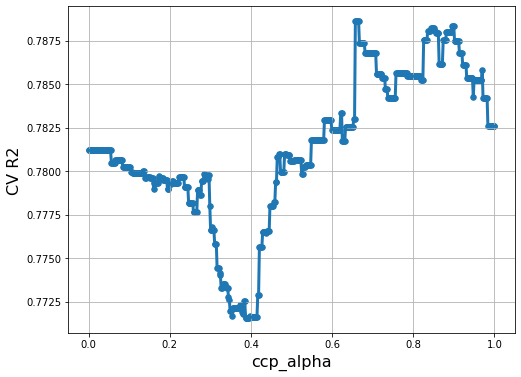

In [20]:
ccp_alpha_dtr = dtr_cv.cv_results_['param_ccp_alpha'].data
r2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha_dtr, r2_scores, s=30)
plt.plot(ccp_alpha_dtr, r2_scores, linewidth=3)
plt.grid(True, which='both')

plt.show()

In [21]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.657314629258517, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}


In [22]:
dtr_cv.best_score_

0.7886094987036202

We observe a moderately high R2 for our optimal ccp_alpha of 0.657. So, we will consider using our decision tree regressor in our blended model.

Below is a visualization of our decision tree, seeing which features are considered first when determining the CAASPP % Passing for each district.

Node count = 45


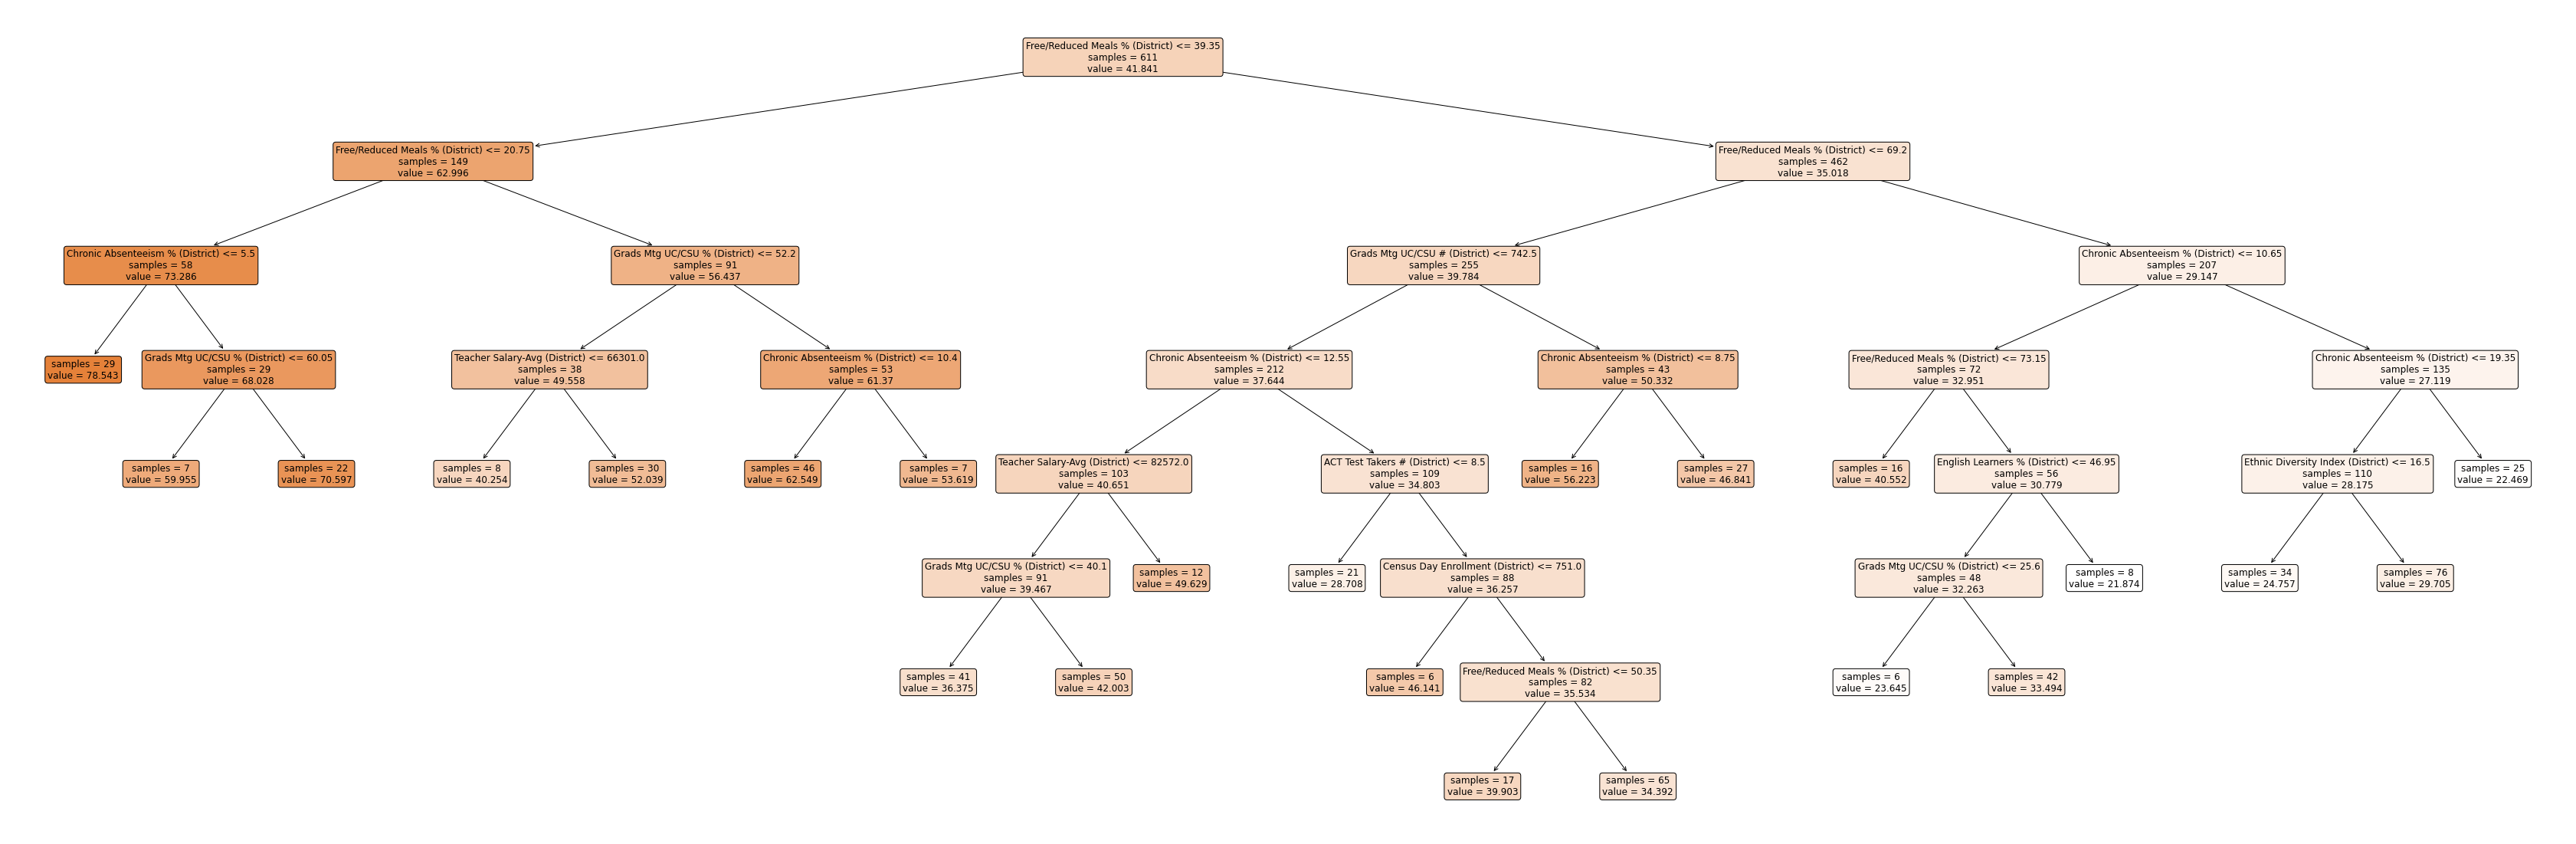

In [23]:
from sklearn.tree import plot_tree

ccp_dtr = dtr_cv.best_estimator_

print('Node count =', ccp_dtr.tree_.node_count)

plt.figure(figsize=(60,20))
plot_tree(ccp_dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12) 
plt.show()

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

grid_values2 = {'max_features': np.linspace(1, len(X_train.columns), len(X_train.columns), dtype='int32'), # Consider 1 to the total number of features
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]}

rf_cv = RandomForestRegressor() 

cv = KFold(n_splits = 5, random_state = 88, shuffle = True) # 5 fold cross validation for each max_features value

rf_cv = GridSearchCV(rf_cv, param_grid = grid_values2, scoring = 'r2', cv = cv, verbose = 1)

rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=1)

Below is the plot examining the R2 for each max_features values between 1 and 20. We will choose the max features parameter based on the highest CV R2.

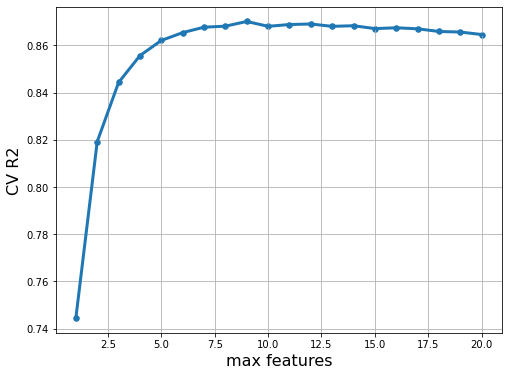

In [25]:
max_features = rf_cv.cv_results_['param_max_features'].data
r2_scores_rf = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, r2_scores_rf, s=30)
plt.plot(max_features, r2_scores_rf, linewidth=3)
plt.grid(True, which='both')

plt.show()

In [26]:
print('Best max_features', rf_cv.best_params_)

rf = rf_cv.best_estimator_

Best max_features {'max_features': 9, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [27]:
rf_cv.best_score_

0.8701230466287683

We observe a relatively high R2 for our optimal max_features value of 0.657. So, we will consider using our random forest model in our blended model.

Below is the importance scores of all features sorted in descending order. We see which features are most important in determining the CAASPP % Passing for each district in our random forest model.

In [28]:
imp = pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)
imp = imp.sort_values("Importance score", ascending = False)
imp

,Feature,Importance score
2,Free/Reduced Meals % (District),46.6
5,Grads Mtg UC/CSU % (District),22.5
11,Chronic Absenteeism % (District),10.1
14,Total Gen Fund Revenues Per Student (District),3.2
1,English Learners % (District),3.1
6,Grads Mtg UC/CSU # (District),2.1
7,ACT Test Takers # (District),1.9
10,Teacher Salary-Avg (District),1.8
4,Cohort Graduates % (District),1.7
3,Ethnic Diversity Index (District),1.5


## Blending

In [29]:
# Gather predictions of the three models on the validation set
X_blend_val = pd.DataFrame(data = {'val_pred_linreg': linreg6.predict(sm.add_constant(X_val[X_train6.columns])),
                     'val_pred_dtr': ccp_dtr.predict(X_val),
                     'val_pred_rf': rf.predict(X_val)})
X_blend_val

,val_pred_linreg,val_pred_dtr,val_pred_rf
292,39.584727,39.902647,41.797308
254,36.184094,29.704868,35.660884
226,41.698115,34.391769,39.949619
27,24.791700,28.707619,28.803548
100,39.985414,34.391769,38.019899
...,...,...,...
21,33.479326,29.704868,32.367204
184,59.721657,62.549457,59.071124
35,57.619577,62.549457,57.751663
293,19.857898,34.391769,33.443627


In [30]:
# Blend three models together through ols linear regression
blending_ols = sm.add_constant(X_blend_val)

blending_res = sm.OLS(y_val, blending_ols).fit()

print(blending_res.summary())

                            OLS Regression Results                            
Dep. Variable:       CAASPP % Passing   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     560.7
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.31e-81
Time:                        14:59:53   Log-Likelihood:                -454.50
No. Observations:                 155   AIC:                             917.0
Df Residuals:                     151   BIC:                             929.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5325      1.162     

In [31]:
# Add the predictions of the blended model to the dataframe
val_pred_blended = blending_res.predict(sm.add_constant(X_blend_val))
X_blend_val['val_pred_blended']= val_pred_blended

X_blend_val

,val_pred_linreg,val_pred_dtr,val_pred_rf,val_pred_blended
292,39.584727,39.902647,41.797308,43.587532
254,36.184094,29.704868,35.660884,37.716735
226,41.698115,34.391769,39.949619,42.213810
27,24.791700,28.707619,28.803548,29.648754
100,39.985414,34.391769,38.019899,39.953098
...,...,...,...,...
21,33.479326,29.704868,32.367204,33.864593
184,59.721657,62.549457,59.071124,61.174230
35,57.619577,62.549457,57.751663,59.600831
293,19.857898,34.391769,33.443627,34.115261


## Test Performance

In [32]:
# Get predictions for linear regression, decision tree regression and random forest on the test set
X_blend_test = pd.DataFrame(data = {'val_pred_linreg': linreg6.predict(sm.add_constant(X_test[X_train6.columns])),
                     'val_pred_dtr': ccp_dtr.predict(X_test),
                     'val_pred_rf': rf.predict(X_test)})
X_blend_test

,val_pred_linreg,val_pred_dtr,val_pred_rf
269,77.185455,78.543276,79.206574
134,21.885844,22.468800,27.080265
105,28.244188,33.494405,30.069988
133,51.571911,49.629167,44.190577
8,42.521771,39.902647,39.691409
...,...,...,...
51,34.178287,34.391769,34.469879
129,34.830547,34.391769,32.327586
290,36.849253,34.391769,35.509749
26,68.778618,70.597045,69.878636


In [33]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)            
    return (1 - SSE/SST)

def MAE(model, X_test, y_test):
  diff = y_test - model.predict(X_test)
  return np.mean(abs(diff))

def RMSE(model, X_test, y_test):
  diff = y_test - model.predict(X_test)
  return np.sqrt(np.mean(diff**2))

In [34]:
print('Baseline MAE:', np.mean(np.abs(y_test - np.mean(y_train))))
print('Linear Regression MAE:', MAE(linreg6, sm.add_constant(X_test[X_train6.columns]), y_test))
print('Regression Tree MAE:', MAE(ccp_dtr, X_test, y_test))
print('Random Forest MAE:', MAE(rf, X_test, y_test))
print('Blended Model MAE:', MAE(blending_res, sm.add_constant(X_blend_test), y_test), '\n')

print('Baseline RMSE:', np.sqrt(np.mean((y_test - np.mean(y_train))**2)))
print('Linear Regression RMSE:', RMSE(linreg6, sm.add_constant(X_test[X_train6.columns]), y_test))
print('Regression Tree RMSE:', RMSE(ccp_dtr, X_test, y_test))
print('Random Forest RMSE:', RMSE(rf, X_test, y_test))
print('Blended Model RMSE:', RMSE(blending_res, sm.add_constant(X_blend_test), y_test), '\n')

print('Linear Regression OSR2:', OSR2(linreg6, sm.add_constant(X_test[X_train6.columns]), y_test, y_train))
print('Regression Tree OSR2:', OSR2(ccp_dtr, X_test, y_test, y_train))
print('Random Forest OSR2:', OSR2(rf, X_test, y_test, y_train))
print('Blended Model OSR2:', OSR2(blending_res, sm.add_constant(X_blend_test), y_test, y_train), '\n')

Baseline MAE: 12.027233133296967
Linear Regression MAE: 5.184440220438947
Regression Tree MAE: 5.203101993363607
Random Forest MAE: 4.156863814631019
Blended Model MAE: 3.8434294968747262 

Baseline RMSE: 15.405715510462189
Linear Regression RMSE: 6.379729951191242
Regression Tree RMSE: 6.306335897483519
Random Forest RMSE: 5.198373783738898
Blended Model RMSE: 4.796145360379238 

Linear Regression OSR2: 0.8285091929626793
Regression Tree OSR2: 0.8324322451844091
Random Forest OSR2: 0.8861399788446034
Blended Model OSR2: 0.9030783214698206 



Our blended model produces the lowest error and highest OSR2 of 0.89

## Part B: UC Admissions

## Data Processing

We will data process three datasets: school level, admissions and district level. We will eventually merge them on District Name and School Name. Therefore, we have to make sure that the values in those columns are in the same format and that the merging columns have the same name.

### School level data

In [35]:
# Load the school datasets
s1 = pd.read_csv("school/schools_1.csv")
s2 = pd.read_csv('school/schools_2.csv')
s3 = pd.read_csv('school/schools_3.csv')
s4 = pd.read_csv("school/schools_4.csv")
s5 = pd.read_csv('school/schools_5.csv')
s6 = pd.read_csv('school/schools_6.csv')
s7 = pd.read_csv("school/schools_7.csv")
s8 = pd.read_csv('school/schools_8.csv')
s9 = pd.read_csv('school/schools_9.csv')
s10 = pd.read_csv('school/schools_10.csv')

In [36]:
# Concatenate the dataframes along axis 0 to combine school data from all years
all_schools = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10], axis = 0)

In [37]:
# Only keep high school data
all_hs = all_schools[all_schools['School Type (School)'] == 'High School']
all_hs

,School Name,District Name (School),School Type (School),County Name (School)
0,Abraham Lincoln High (San Jose Unified),San Jose Unified,High School,Santa Clara
1,Abraham Lincoln Senior High (Los Angeles Unified),Los Angeles Unified,High School,Los Angeles
2,Abraxis Charter (Santa Rosa High),Santa Rosa High,High School,Sonoma
3,Academies of Education and Empowerment at Cars...,Los Angeles Unified,High School,Los Angeles
4,Academies of the Antelope Valley (Antelope Val...,Antelope Valley Union High,High School,Los Angeles
...,...,...,...,...
1346,YouthBuild Charter School of California (Inyo ...,Inyo County Office of Education,High School,Inyo
1347,Yreka High (Yreka Union High),Yreka Union High,High School,Siskiyou
1348,Yuba City High (Yuba City Unified),Yuba City Unified,High School,Sutter
1349,Yucaipa High (Yucaipa-Calimesa Joint Unified),Yucaipa-Calimesa Joint Unified,High School,San Bernardino


In [38]:
# Remove parentheses and district name from the school name, important for future merging on column
import re

all_hs['School Name'] = all_hs['School Name'].apply(lambda x: re.sub(' \(.*\)', '', str(x)))
all_hs

<ipython-input-38-b306db095972>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_hs['School Name'] = all_hs['School Name'].apply(lambda x: re.sub(' \(.*\)', '', str(x)))


,School Name,District Name (School),School Type (School),County Name (School)
0,Abraham Lincoln High,San Jose Unified,High School,Santa Clara
1,Abraham Lincoln Senior High,Los Angeles Unified,High School,Los Angeles
2,Abraxis Charter,Santa Rosa High,High School,Sonoma
3,Academies of Education and Empowerment at Cars...,Los Angeles Unified,High School,Los Angeles
4,Academies of the Antelope Valley,Antelope Valley Union High,High School,Los Angeles
...,...,...,...,...
1346,YouthBuild Charter School of California,Inyo County Office of Education,High School,Inyo
1347,Yreka High,Yreka Union High,High School,Siskiyou
1348,Yuba City High,Yuba City Unified,High School,Sutter
1349,Yucaipa High,Yucaipa-Calimesa Joint Unified,High School,San Bernardino


In [39]:
# Fix Columns
all_hs.rename({'District Name (School)': 'District Name'}, inplace=True, axis=1)
all_hs.rename({'County Name (School)': 'County'}, inplace=True, axis=1)

all_hs = all_hs.drop(['School Type (School)'], axis=1)
all_hs

/Users/tarsus/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,School Name,District Name,County
0,Abraham Lincoln High,San Jose Unified,Santa Clara
1,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles
2,Abraxis Charter,Santa Rosa High,Sonoma
3,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles
4,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles
...,...,...,...
1346,YouthBuild Charter School of California,Inyo County Office of Education,Inyo
1347,Yreka High,Yreka Union High,Siskiyou
1348,Yuba City High,Yuba City Unified,Sutter
1349,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino


### Admissions data

In [40]:
# Import college admissions data for each year
adm_1 = pd.read_csv('admission/adm_1.csv')
adm_2 = pd.read_csv('admission/adm_2.csv')
adm_3 = pd.read_csv('admission/adm_3.csv')
adm_4 = pd.read_csv('admission/adm_4.csv')
adm_5 = pd.read_csv('admission/adm_5.csv')
adm_6 = pd.read_csv('admission/adm_6.csv')
adm_7 = pd.read_csv('admission/adm_7.csv')
adm_8 = pd.read_csv('admission/adm_8.csv')
adm_9 = pd.read_csv('admission/adm_9.csv')

In [41]:
# Add a new column for the year
adm_1 = adm_1.assign(Year = '2010-2011')
adm_2 = adm_2.assign(Year = '2011-2012')
adm_3 = adm_3.assign(Year = '2012-2013')
adm_4 = adm_4.assign(Year = '2013-2014')
adm_5 = adm_5.assign(Year = '2014-2015')
adm_6 = adm_6.assign(Year = '2015-2016')
adm_7 = adm_7.assign(Year = '2016-2017')
adm_8 = adm_8.assign(Year = '2017-2018')
adm_9 = adm_9.assign(Year = '2018-2019')

In [42]:
# Combine all the admission data into one dataframe
adm_data = pd.concat([adm_1, adm_2, adm_3, adm_4, adm_5, adm_6, adm_7, adm_8, adm_9], axis=0)
adm_data.head()

,Calculation1,City,County/State/ Territory,Count,Gender,School,Pivot Field Values,Year
0,A B MILLER HIGH SCHOOL50944,Fontana,San Bernardino,Enr,Male,A B MILLER HIGH SCHOOL,10,2010-2011
1,A B MILLER HIGH SCHOOL50944,Fontana,San Bernardino,Adm,Male,A B MILLER HIGH SCHOOL,14,2010-2011
2,A B MILLER HIGH SCHOOL50944,Fontana,San Bernardino,App,Male,A B MILLER HIGH SCHOOL,21,2010-2011
3,A B MILLER HIGH SCHOOL50944,Fontana,San Bernardino,Enr,Female,A B MILLER HIGH SCHOOL,21,2010-2011
4,A B MILLER HIGH SCHOOL50944,Fontana,San Bernardino,Adm,Female,A B MILLER HIGH SCHOOL,30,2010-2011


In [43]:
# Drop unwanted columns
adm_data = adm_data.drop('Calculation1', axis=1)

In [44]:
# Rename the school column to match column name of the school level dataset
adm_data.rename({'School':'School Name'}, inplace=True, axis=1)

# Rename columns for readability
adm_data = adm_data.rename({'Pivot Field Values': 'Student Count'}, axis = 1)
adm_data = adm_data.rename({'County/State/ Territory': 'County'}, axis = 1)

In [45]:
# Fixing up school names to resemble those of school level dataset
adm_data['School Name'] = adm_data['School Name'].apply(lambda x: ' '.join([word.capitalize() for word in str(x).split()]))

adm_data['School Name'] = adm_data['School Name'].apply(lambda x: x.rsplit(' ', 1)[0])
adm_data

,City,County,Count,Gender,School Name,Student Count,Year
0,Fontana,San Bernardino,Enr,Male,A B Miller High,10,2010-2011
1,Fontana,San Bernardino,Adm,Male,A B Miller High,14,2010-2011
2,Fontana,San Bernardino,App,Male,A B Miller High,21,2010-2011
3,Fontana,San Bernardino,Enr,Female,A B Miller High,21,2010-2011
4,Fontana,San Bernardino,Adm,Female,A B Miller High,30,2010-2011
...,...,...,...,...,...,...,...
9084,Yucca Valley,San Bernardino,Adm,Female,Yucca Valley High,13,2018-2019
9085,Yucca Valley,San Bernardino,App,Female,Yucca Valley High,13,2018-2019
9086,Yucca Valley,San Bernardino,Enr,All,Yucca Valley High,12,2018-2019
9087,Yucca Valley,San Bernardino,Adm,All,Yucca Valley High,21,2018-2019


In [46]:
# Remove male and female rows since we are only concerned about the total admissions
adm_data = adm_data[adm_data["Gender"] == "All"]
adm_data = adm_data.drop('Gender', axis=1)
adm_data

,City,County,Count,School Name,Student Count,Year
6,Fontana,San Bernardino,Enr,A B Miller High,31,2010-2011
7,Fontana,San Bernardino,Adm,A B Miller High,44,2010-2011
8,Fontana,San Bernardino,App,A B Miller High,61,2010-2011
15,Los Angeles,Los Angeles,Enr,Abraham Lincoln High,55,2010-2011
16,Los Angeles,Los Angeles,Adm,Abraham Lincoln High,74,2010-2011
...,...,...,...,...,...,...
9078,Yucaipa,San Bernardino,Adm,Yucaipa Senior High,51,2018-2019
9079,Yucaipa,San Bernardino,App,Yucaipa Senior High,86,2018-2019
9086,Yucca Valley,San Bernardino,Enr,Yucca Valley High,12,2018-2019
9087,Yucca Valley,San Bernardino,Adm,Yucca Valley High,21,2018-2019


### District level data

In [47]:
# Using the district level data imported in Part A
sd_all

,District Name,County Name (District),District Type (District),Census Day Enrollment (District),English Learners % (District),Free/Reduced Meals % (District),Ethnic Diversity Index (District),Cohort Graduates % (District),Grads Mtg UC/CSU % (District),Grads Mtg UC/CSU # (District),...,CAASPP-Math Standard Exceeded or Met (Levels 3 and 4) (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 5000-5999 Community Services Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Year
0,Calistoga Joint Unified (Napa),Napa,Unified School District,858,Not Certified,78.4,5,82.19,100,63,...,NaN,12806.0,604.0,13952.0,239.0,8543.0,31,1250.0,781.0,2010-2011
1,Death Valley Unified (Inyo),Inyo,Unified School District,51,Not Certified,84.3,28,100,redacted,redacted,...,NaN,25438.0,1733.0,27294.0,312.0,12543.0,0,4458.0,4449.0,2010-2011
2,Golden Valley Unified (Madera),Madera,Unified School District,1925,6.2,46.1,36,91.03,100,143,...,NaN,7633.0,256.0,8320.0,107.0,4329.0,0,781.0,533.0,2010-2011
3,Warner Unified (San Diego),San Diego,Unified School District,286,8.4,75.2,56,90,100,31,...,NaN,13610.0,1019.0,15644.0,56.0,7675.0,0,1998.0,2465.0,2010-2011
4,Acton-Agua Dulce Unified (Los Angeles),Los Angeles,Unified School District,1696,Not Certified,30.3,34,90,99.3,138,...,NaN,7795.0,431.0,8361.0,77.0,4778.0,0,687.0,909.0,2010-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Woodland Joint Unified (Yolo),Yolo,Unified School District,10031,23.3,60.3,32,92.3,47.7,327,...,27.89,12175.0,422.0,13128.0,92.0,7653.0,19,619.0,1296.0,2018-2019
341,Yosemite Unified (Madera),Madera,Unified School District,2060,2,48.2,36,83.8,49.3,74,...,34.89,12771.0,587.0,14195.0,83.0,6795.0,38,1157.0,1391.0,2018-2019
342,Yuba City Unified (Sutter),Sutter,Unified School District,13111,22.1,74.2,53,85.8,37.7,314,...,29.59,12987.0,793.0,13557.0,133.0,8195.0,0,679.0,1114.0,2018-2019
343,Yucaipa-Calimesa Joint Unified (San Bernardino),San Bernardino,Unified School District,9982,7.6,50.8,39,90.5,46.2,306,...,36.33,11629.0,346.0,12174.0,149.0,7204.0,0,661.0,1460.0,2018-2019


In [48]:
# Remove unwanted characters in District Name
sd_all['District Name'] = sd_all['District Name'].apply(lambda x: re.sub(' \(.*\)', '', str(x)))
sd_all.head()

,District Name,County Name (District),District Type (District),Census Day Enrollment (District),English Learners % (District),Free/Reduced Meals % (District),Ethnic Diversity Index (District),Cohort Graduates % (District),Grads Mtg UC/CSU % (District),Grads Mtg UC/CSU # (District),...,CAASPP-Math Standard Exceeded or Met (Levels 3 and 4) (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 5000-5999 Community Services Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Year
0,Calistoga Joint Unified,Napa,Unified School District,858,Not Certified,78.4,5,82.19,100,63,...,NaN,12806.0,604.0,13952.0,239.0,8543.0,31,1250.0,781.0,2010-2011
1,Death Valley Unified,Inyo,Unified School District,51,Not Certified,84.3,28,100,redacted,redacted,...,NaN,25438.0,1733.0,27294.0,312.0,12543.0,0,4458.0,4449.0,2010-2011
2,Golden Valley Unified,Madera,Unified School District,1925,6.2,46.1,36,91.03,100,143,...,NaN,7633.0,256.0,8320.0,107.0,4329.0,0,781.0,533.0,2010-2011
3,Warner Unified,San Diego,Unified School District,286,8.4,75.2,56,90,100,31,...,NaN,13610.0,1019.0,15644.0,56.0,7675.0,0,1998.0,2465.0,2010-2011
4,Acton-Agua Dulce Unified,Los Angeles,Unified School District,1696,Not Certified,30.3,34,90,99.3,138,...,NaN,7795.0,431.0,8361.0,77.0,4778.0,0,687.0,909.0,2010-2011


### Merging

Having modified each dataset, we will now merge them all together. We want to end up with a final dataset containing UC admission rates at the district level along with the same features used in Part A.

However, our UC admissions dataset does not have District Name to merge with the district level data. Therefore, we first merge with the school level data to get District Name and merge again with the district level data.

In [49]:
# Merge school level and admissions data to get District Name and college admissions statistics in one table
hs_adm = adm_data.merge(all_hs, on=['School Name', 'County'])
hs_adm = hs_adm.drop_duplicates()
hs_adm.sort_values(by='School Name', inplace=True)

# Check that each school has enrolled, applied and admitted statistics for each school year
hs_adm.head(28) # 3 x 9 = 27, 28th should be next school

,City,County,Count,School Name,Student Count,Year,District Name
0,San Jose,Santa Clara,Enr,Abraham Lincoln High,16,2010-2011,San Jose Unified
78,San Jose,Santa Clara,App,Abraham Lincoln High,105,2018-2019,San Jose Unified
75,San Jose,Santa Clara,Adm,Abraham Lincoln High,56,2018-2019,San Jose Unified
72,San Jose,Santa Clara,Enr,Abraham Lincoln High,23,2018-2019,San Jose Unified
69,San Jose,Santa Clara,App,Abraham Lincoln High,100,2017-2018,San Jose Unified
66,San Jose,Santa Clara,Adm,Abraham Lincoln High,58,2017-2018,San Jose Unified
63,San Jose,Santa Clara,Enr,Abraham Lincoln High,26,2017-2018,San Jose Unified
60,San Jose,Santa Clara,App,Abraham Lincoln High,123,2016-2017,San Jose Unified
54,San Jose,Santa Clara,Enr,Abraham Lincoln High,33,2016-2017,San Jose Unified
51,San Jose,Santa Clara,App,Abraham Lincoln High,78,2015-2016,San Jose Unified


In [50]:
# Now we can merge on district name to get college admissions and district level data in the same table
sd_acceptance = hs_adm.merge(sd_all, on=['District Name', 'Year'], how='inner')
# Sort by school name
sd_acceptance.sort_values(by=['School Name', 'Year'], inplace=True)
sd_acceptance.head(28)

,City,County,Count,School Name,Student Count,Year,District Name,County Name (District),District Type (District),Census Day Enrollment (District),...,CAASPP-ELA Standard Exceeded or Met (Levels 3 and 4) (District),CAASPP-Math Standard Exceeded or Met (Levels 3 and 4) (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 5000-5999 Community Services Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)
0,San Jose,Santa Clara,Enr,Abraham Lincoln High,16,2010-2011,San Jose Unified,Santa Clara,Unified School District,33018,...,NaN,NaN,8963.0,365.0,9112.0,135.0,5235.0,0,403.0,727.0
1,San Jose,Santa Clara,App,Abraham Lincoln High,60,2010-2011,San Jose Unified,Santa Clara,Unified School District,33018,...,NaN,NaN,8963.0,365.0,9112.0,135.0,5235.0,0,403.0,727.0
2,San Jose,Santa Clara,Adm,Abraham Lincoln High,46,2010-2011,San Jose Unified,Santa Clara,Unified School District,33018,...,NaN,NaN,8963.0,365.0,9112.0,135.0,5235.0,0,403.0,727.0
90,San Jose,Santa Clara,Enr,Abraham Lincoln High,30,2011-2012,San Jose Unified,Santa Clara,Unified School District,33306,...,NaN,NaN,8985.0,302.0,9047.0,128.0,5366.0,0,427.0,773.0
91,San Jose,Santa Clara,Adm,Abraham Lincoln High,47,2011-2012,San Jose Unified,Santa Clara,Unified School District,33306,...,NaN,NaN,8985.0,302.0,9047.0,128.0,5366.0,0,427.0,773.0
92,San Jose,Santa Clara,App,Abraham Lincoln High,63,2011-2012,San Jose Unified,Santa Clara,Unified School District,33306,...,NaN,NaN,8985.0,302.0,9047.0,128.0,5366.0,0,427.0,773.0
105,San Jose,Santa Clara,Enr,Abraham Lincoln High,23,2012-2013,San Jose Unified,Santa Clara,Unified School District,33184,...,NaN,NaN,9040.0,325.0,9038.0,130.0,5373.0,0,425.0,732.0
106,San Jose,Santa Clara,App,Abraham Lincoln High,70,2012-2013,San Jose Unified,Santa Clara,Unified School District,33184,...,NaN,NaN,9040.0,325.0,9038.0,130.0,5373.0,0,425.0,732.0
107,San Jose,Santa Clara,Adm,Abraham Lincoln High,47,2012-2013,San Jose Unified,Santa Clara,Unified School District,33184,...,NaN,NaN,9040.0,325.0,9038.0,130.0,5373.0,0,425.0,732.0
120,San Jose,Santa Clara,Enr,Abraham Lincoln High,25,2013-2014,San Jose Unified,Santa Clara,Unified School District,33152,...,NaN,NaN,9400.0,401.0,9500.0,129.0,5516.0,0,518.0,836.0


Now we want to calculate our target variable, which is UC admissions rate for each district, by dividing the Admitted count by the Applied count. We accomplished this by pivotting the table.

In [51]:
# Aggregate on school district, get all admitted, enrolled and applied data per year per school district
sd_acceptance = sd_acceptance.groupby(['District Name', 'Count', 'Year']).sum().reset_index()
sd_acceptance

,District Name,Count,Year,Student Count,ACT Test Takers # (District),Per Pupil Ratio: Teacher (District),Avg Years Teaching (District),Teacher Salary-Avg (District),Chronic Absenteeism % (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)
0,ABC Unified,Adm,2010-2011,205,0.0,49.0,30.0,143614.0,0.0,16108.0,688.0,16586.0,0.0,10458.0,952.0,1116.0
1,ABC Unified,Adm,2011-2012,207,0.0,49.6,30.0,143774.0,0.0,16216.0,756.0,16356.0,0.0,10592.0,954.0,1142.0
2,ABC Unified,Adm,2012-2013,183,0.0,48.2,28.0,143186.0,0.0,16010.0,598.0,16480.0,0.0,10534.0,912.0,1102.0
3,ABC Unified,Adm,2013-2014,200,0.0,49.2,28.0,152394.0,0.0,16818.0,768.0,17876.0,0.0,11010.0,938.0,1194.0
4,ABC Unified,Adm,2014-2015,182,0.0,48.0,28.0,156382.0,0.0,17850.0,990.0,18804.0,0.0,11618.0,968.0,1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,Yuba City Unified,Enr,2014-2015,43,0.0,40.0,24.0,128330.0,0.0,18236.0,1224.0,18916.0,152.0,11812.0,888.0,1520.0
6602,Yuba City Unified,Enr,2015-2016,31,402.0,39.6,24.0,132862.0,0.0,19472.0,1322.0,22078.0,186.0,12314.0,1086.0,1586.0
6603,Yuba City Unified,Enr,2016-2017,40,332.0,39.4,24.0,137350.0,36.4,21636.0,1288.0,23672.0,274.0,13470.0,1402.0,1764.0
6604,Yuba City Unified,Enr,2017-2018,27,296.0,36.0,24.0,146336.0,24.6,23652.0,1622.0,23458.0,238.0,14540.0,1342.0,2018.0


In [52]:
# Pivot to make Count as columns
pivoted = sd_acceptance.pivot(index=['District Name', 'Year'], columns='Count', values='Student Count').reset_index()
pivoted

Count,District Name,Year,Adm,App,Enr
0,ABC Unified,2010-2011,205.0,270.0,120.0
1,ABC Unified,2011-2012,207.0,281.0,131.0
2,ABC Unified,2012-2013,183.0,258.0,108.0
3,ABC Unified,2013-2014,200.0,275.0,105.0
4,ABC Unified,2014-2015,182.0,271.0,98.0
...,...,...,...,...,...
2232,Yuba City Unified,2014-2015,64.0,94.0,43.0
2233,Yuba City Unified,2015-2016,62.0,98.0,31.0
2234,Yuba City Unified,2016-2017,74.0,111.0,40.0
2235,Yuba City Unified,2017-2018,56.0,87.0,27.0


In [53]:
# Retain only one entry for each district per year
sd_adm = sd_acceptance[sd_acceptance['Count'] == 'Adm']

dist_acceptance = pd.merge(sd_adm, pivoted, on=['District Name', 'Year'], how='inner')
dist_acceptance

,District Name,Count,Year,Student Count,ACT Test Takers # (District),Per Pupil Ratio: Teacher (District),Avg Years Teaching (District),Teacher Salary-Avg (District),Chronic Absenteeism % (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Adm,App,Enr
0,ABC Unified,Adm,2010-2011,205,0.0,49.0,30.0,143614.0,0.0,16108.0,688.0,16586.0,0.0,10458.0,952.0,1116.0,205.0,270.0,120.0
1,ABC Unified,Adm,2011-2012,207,0.0,49.6,30.0,143774.0,0.0,16216.0,756.0,16356.0,0.0,10592.0,954.0,1142.0,207.0,281.0,131.0
2,ABC Unified,Adm,2012-2013,183,0.0,48.2,28.0,143186.0,0.0,16010.0,598.0,16480.0,0.0,10534.0,912.0,1102.0,183.0,258.0,108.0
3,ABC Unified,Adm,2013-2014,200,0.0,49.2,28.0,152394.0,0.0,16818.0,768.0,17876.0,0.0,11010.0,938.0,1194.0,200.0,275.0,105.0
4,ABC Unified,Adm,2014-2015,182,0.0,48.0,28.0,156382.0,0.0,17850.0,990.0,18804.0,0.0,11618.0,968.0,1320.0,182.0,271.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,Yuba City Unified,Adm,2014-2015,64,0.0,40.0,24.0,128330.0,0.0,18236.0,1224.0,18916.0,152.0,11812.0,888.0,1520.0,64.0,94.0,43.0
2230,Yuba City Unified,Adm,2015-2016,62,402.0,39.6,24.0,132862.0,0.0,19472.0,1322.0,22078.0,186.0,12314.0,1086.0,1586.0,62.0,98.0,31.0
2231,Yuba City Unified,Adm,2016-2017,74,332.0,39.4,24.0,137350.0,36.4,21636.0,1288.0,23672.0,274.0,13470.0,1402.0,1764.0,74.0,111.0,40.0
2232,Yuba City Unified,Adm,2017-2018,56,296.0,36.0,24.0,146336.0,24.6,23652.0,1622.0,23458.0,238.0,14540.0,1342.0,2018.0,56.0,87.0,27.0


In [54]:
# Add new column of admission rates by dividing admission by applied
dist_acceptance['Admission Rate to UC System'] = dist_acceptance['Adm'] / dist_acceptance['App']
dist_acceptance

,District Name,Count,Year,Student Count,ACT Test Takers # (District),Per Pupil Ratio: Teacher (District),Avg Years Teaching (District),Teacher Salary-Avg (District),Chronic Absenteeism % (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Adm,App,Enr,Admission Rate to UC System
0,ABC Unified,Adm,2010-2011,205,0.0,49.0,30.0,143614.0,0.0,16108.0,688.0,16586.0,0.0,10458.0,952.0,1116.0,205.0,270.0,120.0,0.759259
1,ABC Unified,Adm,2011-2012,207,0.0,49.6,30.0,143774.0,0.0,16216.0,756.0,16356.0,0.0,10592.0,954.0,1142.0,207.0,281.0,131.0,0.736655
2,ABC Unified,Adm,2012-2013,183,0.0,48.2,28.0,143186.0,0.0,16010.0,598.0,16480.0,0.0,10534.0,912.0,1102.0,183.0,258.0,108.0,0.709302
3,ABC Unified,Adm,2013-2014,200,0.0,49.2,28.0,152394.0,0.0,16818.0,768.0,17876.0,0.0,11010.0,938.0,1194.0,200.0,275.0,105.0,0.727273
4,ABC Unified,Adm,2014-2015,182,0.0,48.0,28.0,156382.0,0.0,17850.0,990.0,18804.0,0.0,11618.0,968.0,1320.0,182.0,271.0,98.0,0.671587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,Yuba City Unified,Adm,2014-2015,64,0.0,40.0,24.0,128330.0,0.0,18236.0,1224.0,18916.0,152.0,11812.0,888.0,1520.0,64.0,94.0,43.0,0.680851
2230,Yuba City Unified,Adm,2015-2016,62,402.0,39.6,24.0,132862.0,0.0,19472.0,1322.0,22078.0,186.0,12314.0,1086.0,1586.0,62.0,98.0,31.0,0.632653
2231,Yuba City Unified,Adm,2016-2017,74,332.0,39.4,24.0,137350.0,36.4,21636.0,1288.0,23672.0,274.0,13470.0,1402.0,1764.0,74.0,111.0,40.0,0.666667
2232,Yuba City Unified,Adm,2017-2018,56,296.0,36.0,24.0,146336.0,24.6,23652.0,1622.0,23458.0,238.0,14540.0,1342.0,2018.0,56.0,87.0,27.0,0.643678


## Data Cleaning

In [55]:
# Remove nan and specified string values
sd_all_cleaned = dist_acceptance.copy()
for col in sd_all_cleaned.columns:
  sd_all_cleaned = sd_all_cleaned.replace('', np.nan)
  sd_all_cleaned = sd_all_cleaned[~(sd_all_cleaned[col].isin(["redacted", "(1)", "Not Certified"]) | pd.isna(sd_all_cleaned[col]))]

In [56]:
# Split into training, validation and test sets
years = sd_all_cleaned["Year"].unique()

# Use 2010-2016 for training
sd_train = sd_all_cleaned[sd_all_cleaned["Year"].isin(years[:len(years)-2])]

sd_val = sd_all_cleaned[sd_all_cleaned['Year'] == "2017-2018"] # Use 2017 for validation
sd_test = sd_all_cleaned[sd_all_cleaned['Year'] == "2018-2019"] # Use 2018 for validation

# Choose the features to be used
cols = list(sd_all_cleaned.columns)[4:len(sd_all_cleaned.columns)-4]


# Split into X and y sets
X_train = sd_train[cols].astype(float)
y_train = sd_train["Admission Rate to UC System"]

X_val = sd_val[cols].astype(float)
y_val = sd_val["Admission Rate to UC System"]

X_test = sd_test[cols].astype(float)
y_test = sd_test["Admission Rate to UC System"]

sd_train

,District Name,Count,Year,Student Count,ACT Test Takers # (District),Per Pupil Ratio: Teacher (District),Avg Years Teaching (District),Teacher Salary-Avg (District),Chronic Absenteeism % (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Adm,App,Enr,Admission Rate to UC System
0,ABC Unified,Adm,2010-2011,205,0.0,49.0,30.0,143614.0,0.0,16108.0,688.0,16586.0,0.0,10458.0,952.0,1116.0,205.0,270.0,120.0,0.759259
1,ABC Unified,Adm,2011-2012,207,0.0,49.6,30.0,143774.0,0.0,16216.0,756.0,16356.0,0.0,10592.0,954.0,1142.0,207.0,281.0,131.0,0.736655
2,ABC Unified,Adm,2012-2013,183,0.0,48.2,28.0,143186.0,0.0,16010.0,598.0,16480.0,0.0,10534.0,912.0,1102.0,183.0,258.0,108.0,0.709302
3,ABC Unified,Adm,2013-2014,200,0.0,49.2,28.0,152394.0,0.0,16818.0,768.0,17876.0,0.0,11010.0,938.0,1194.0,200.0,275.0,105.0,0.727273
4,ABC Unified,Adm,2014-2015,182,0.0,48.0,28.0,156382.0,0.0,17850.0,990.0,18804.0,0.0,11618.0,968.0,1320.0,182.0,271.0,98.0,0.671587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,Yuba City Unified,Adm,2012-2013,72,0.0,41.6,22.0,116650.0,0.0,15306.0,644.0,15410.0,126.0,9974.0,852.0,1232.0,72.0,108.0,40.0,0.666667
2228,Yuba City Unified,Adm,2013-2014,52,0.0,40.6,22.0,121336.0,0.0,16684.0,806.0,17072.0,144.0,10762.0,864.0,1404.0,52.0,77.0,26.0,0.675325
2229,Yuba City Unified,Adm,2014-2015,64,0.0,40.0,24.0,128330.0,0.0,18236.0,1224.0,18916.0,152.0,11812.0,888.0,1520.0,64.0,94.0,43.0,0.680851
2230,Yuba City Unified,Adm,2015-2016,62,402.0,39.6,24.0,132862.0,0.0,19472.0,1322.0,22078.0,186.0,12314.0,1086.0,1586.0,62.0,98.0,31.0,0.632653


## Linear Regression

In [57]:
X1 = sm.add_constant(X_train)

linreg1 = sm.OLS(y_train, X1).fit()
print(linreg1.summary())

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.037
Model:                                     OLS   Adj. R-squared:                  0.030
Method:                          Least Squares   F-statistic:                     5.305
Date:                         Wed, 12 May 2021   Prob (F-statistic):           7.39e-09
Time:                                 14:59:54   Log-Likelihood:                 1403.4
No. Observations:                         1671   AIC:                            -2781.
Df Residuals:                             1658   BIC:                            -2710.
Df Model:                                   12                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

We want to remove the features with high multicollinearity by examining their VIF values. We also keep an eye out for drastic changes in the R2 score when removing.

In [58]:
VIF(X1, X_train.columns)

ACT Test Takers # (District)                                                              1.589048
Per Pupil Ratio: Teacher (District)                                                      25.840407
Avg Years Teaching (District)                                                            27.805104
Teacher Salary-Avg (District)                                                            36.693027
Chronic Absenteeism % (District)                                                          1.462258
Current Exp of Educ per ADA (Ed Code 41372) (District)                                  641.959520
Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)           6.862443
Total Gen Fund Revenues Per Student (District)                                          187.257928
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)          3.099618
Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District)               336.746454
Gen Fund E

In [59]:
X_train2 = X_train.drop(['Current Exp of Educ per ADA (Ed Code 41372) (District)'],axis=1)
X2 = sm.add_constant(X_train2)

linreg2 = sm.OLS(y_train, X2).fit()
print(linreg2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.037
Model:                                     OLS   Adj. R-squared:                  0.030
Method:                          Least Squares   F-statistic:                     5.763
Date:                         Wed, 12 May 2021   Prob (F-statistic):           3.34e-09
Time:                                 14:59:54   Log-Likelihood:                 1403.2
No. Observations:                         1671   AIC:                            -2782.
Df Residuals:                             1659   BIC:                            -2717.
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

In [60]:
VIF(X2, X_train2.columns)

ACT Test Takers # (District)                                                              1.585811
Per Pupil Ratio: Teacher (District)                                                      25.832795
Avg Years Teaching (District)                                                            27.425935
Teacher Salary-Avg (District)                                                            36.603462
Chronic Absenteeism % (District)                                                          1.458321
Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)           6.851727
Total Gen Fund Revenues Per Student (District)                                          128.708855
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)          2.966398
Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District)               121.431333
Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)     10.334302
Gen Fund E

In [61]:
X_train3 = X_train2.drop(['Total Gen Fund Revenues Per Student (District)'],axis=1)
X3 = sm.add_constant(X_train3)
linreg3 = sm.OLS(y_train, X3).fit()
print(linreg3.summary(),'\n')

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.037
Model:                                     OLS   Adj. R-squared:                  0.031
Method:                          Least Squares   F-statistic:                     6.342
Date:                         Wed, 12 May 2021   Prob (F-statistic):           1.27e-09
Time:                                 14:59:54   Log-Likelihood:                 1403.2
No. Observations:                         1671   AIC:                            -2784.
Df Residuals:                             1660   BIC:                            -2725.
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

In [62]:
VIF(X3, X_train3.columns)

ACT Test Takers # (District)                                                             1.502436
Per Pupil Ratio: Teacher (District)                                                     25.786986
Avg Years Teaching (District)                                                           27.348602
Teacher Salary-Avg (District)                                                           36.363642
Chronic Absenteeism % (District)                                                         1.458112
Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)          6.317612
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)         2.639742
Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District)               64.205917
Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)     8.984514
Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)            12.960447
dtype: float64

In [63]:
X_train4 = X_train3.drop(['Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District)'],axis=1)
X4 = sm.add_constant(X_train4)
linreg4 = sm.OLS(y_train, X4).fit()
print(linreg4.summary(),'\n')

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.033
Model:                                     OLS   Adj. R-squared:                  0.027
Method:                          Least Squares   F-statistic:                     6.238
Date:                         Wed, 12 May 2021   Prob (F-statistic):           1.05e-08
Time:                                 14:59:54   Log-Likelihood:                 1399.7
No. Observations:                         1671   AIC:                            -2779.
Df Residuals:                             1661   BIC:                            -2725.
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

In [64]:
VIF(X4, X_train4.columns)

ACT Test Takers # (District)                                                             1.501246
Per Pupil Ratio: Teacher (District)                                                     25.784075
Avg Years Teaching (District)                                                           24.446694
Teacher Salary-Avg (District)                                                           29.391663
Chronic Absenteeism % (District)                                                         1.407756
Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)          5.473385
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)         2.568927
Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)     6.810806
Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)            11.164455
dtype: float64

In [65]:
X_train5 = X_train4.drop(['Teacher Salary-Avg (District)'],axis=1)
X5 = sm.add_constant(X_train5)
linreg5 = sm.OLS(y_train, X5).fit()
print(linreg4.summary(),'\n')

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.033
Model:                                     OLS   Adj. R-squared:                  0.027
Method:                          Least Squares   F-statistic:                     6.238
Date:                         Wed, 12 May 2021   Prob (F-statistic):           1.05e-08
Time:                                 14:59:54   Log-Likelihood:                 1399.7
No. Observations:                         1671   AIC:                            -2779.
Df Residuals:                             1661   BIC:                            -2725.
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

In [66]:
VIF(X5, X_train5.columns)

ACT Test Takers # (District)                                                             1.500355
Per Pupil Ratio: Teacher (District)                                                     16.889439
Avg Years Teaching (District)                                                           21.745809
Chronic Absenteeism % (District)                                                         1.346675
Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)          5.291020
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)         2.503291
Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)     6.734335
Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)            11.091477
dtype: float64

In [67]:
X_train6 = X_train5.drop(['Avg Years Teaching (District)'],axis=1)
X6 = sm.add_constant(X_train6)
linreg6 = sm.OLS(y_train, X6).fit()
print(linreg6.summary(),'\n')

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.029
Model:                                     OLS   Adj. R-squared:                  0.025
Method:                          Least Squares   F-statistic:                     7.213
Date:                         Wed, 12 May 2021   Prob (F-statistic):           1.57e-08
Time:                                 14:59:54   Log-Likelihood:                 1396.9
No. Observations:                         1671   AIC:                            -2778.
Df Residuals:                             1663   BIC:                            -2734.
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

In [68]:
VIF(X6, X_train6.columns)

ACT Test Takers # (District)                                                             1.461569
Per Pupil Ratio: Teacher (District)                                                      4.810530
Chronic Absenteeism % (District)                                                         1.328715
Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)          5.288022
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)         2.503026
Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)     6.716536
Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)            10.151273
dtype: float64

In [69]:
X_train7 = X_train6.drop(['Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District)'],axis=1)
X7 = sm.add_constant(X_train7)
linreg7 = sm.OLS(y_train, X7).fit()
print(linreg7.summary(),'\n')

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.029
Model:                                     OLS   Adj. R-squared:                  0.026
Method:                          Least Squares   F-statistic:                     8.410
Date:                         Wed, 12 May 2021   Prob (F-statistic):           5.23e-09
Time:                                 14:59:54   Log-Likelihood:                 1396.9
No. Observations:                         1671   AIC:                            -2780.
Df Residuals:                             1664   BIC:                            -2742.
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

In [70]:
VIF(X7, X_train7.columns)

ACT Test Takers # (District)                                                            1.430676
Per Pupil Ratio: Teacher (District)                                                     3.542321
Chronic Absenteeism % (District)                                                        1.282451
Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)         4.696959
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)        2.502720
Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)    5.396638
dtype: float64

After removing the variables with high VIF values, we now want to remove variables that are not significant based on their p-values. We will remove all variables with p-value > 0.05. For simplicity, we removed the variables all at once, but we did check that each variable is still insignificant after each removal.

We initially also removed "Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)" but that drastically reduced our R2. Therefore, we removed "Per Pupil Ratio: Teacher (District)" instead.

In [71]:
# Remove variables with high p-values (>0.05)
p_cols = ['ACT Test Takers # (District)',
          'Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District)',
          'Per Pupil Ratio: Teacher (District)']

X_train_p = X_train7.drop(p_cols, axis = 1)
X_p = sm.add_constant(X_train_p)

linreg_p = sm.OLS(y_train, X_p).fit()
print(linreg_p.summary())

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.027
Model:                                     OLS   Adj. R-squared:                  0.026
Method:                          Least Squares   F-statistic:                     15.65
Date:                         Wed, 12 May 2021   Prob (F-statistic):           4.88e-10
Time:                                 14:59:54   Log-Likelihood:                 1395.1
No. Observations:                         1671   AIC:                            -2782.
Df Residuals:                             1667   BIC:                            -2761.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                                                                           coef    std err          t   

In [72]:
VIF(X_p, X_train_p.columns)

Chronic Absenteeism % (District)                                                        1.139194
Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District)        2.299605
Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District)    2.441869
dtype: float64

Our final linear regression model has a really low R2 score of 0.027, so we will most likely not use it in our blended model.

## Decision Tree

In [73]:
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 500), # 500 cp values in [0,0.001]
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 

dtr = DecisionTreeRegressor()

cv = KFold(n_splits = 5, random_state = 88, shuffle = True) # 5 fold cross validation for each cp value

dtr_cv = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv = cv, verbose = 1)

dtr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   21.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.00400802e-06, 4.00801603e-06, 6.01202405e-06,
       8.01603206e-06, 1.00200401e-05, 1.20240481e-05, 1.40280561e-05,
       1.60320641e-05, 1.80360721e-05, 2.00400802e-05, 2.20440882e-05,
       2.40480962e-05, 2.60521042e-05, 2.80561122e-...
       9.69939880e-04, 9.71943888e-04, 9.73947896e-04, 9.75951904e-04,
       9.77955912e-04, 9.79959920e-04, 9.81963928e-04, 9.83967936e-04,
       9.85971944e-04, 9.87975952e-04, 9.89979960e-04, 9.91983968e-04,
       9.93987976e-04, 9.95991984e-04, 9.97995992e-04, 1.00000000e-03]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='r2', verbose=1)

Below is the plot examining the R2 for each ccp_alpha between 0 and 0.001. We will choose the optimal complexity parameter based on the highest CV R2.

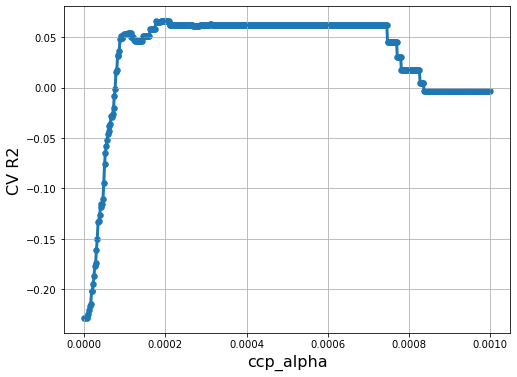

In [74]:
ccp_alpha_dtr = dtr_cv.cv_results_['param_ccp_alpha'].data
r2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha_dtr, r2_scores, s=30)
plt.plot(ccp_alpha_dtr, r2_scores, linewidth=3)
plt.grid(True, which='both')

plt.show()

In [75]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.00018837675350701403, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}


In [76]:
dtr_cv.best_score_

0.06574800019913989

We observe a really low R2 for our optimal ccp_alpha of 0.000188. So, we will most likely not use our decision tree regressor in our blended model.

Below is a visualization of our decision tree, seeing which features are considered first when determining the UC Admissions rate for each district.

Node count = 5


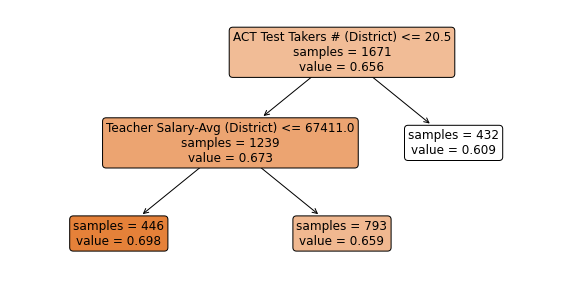

In [77]:
ccp_dtr = dtr_cv.best_estimator_

print('Node count =', ccp_dtr.tree_.node_count)

plt.figure(figsize=(10,5))
plot_tree(ccp_dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12) 
plt.show()

## Random Forest

In [78]:
# Consider 1 to the total number of features (for max_features) while keeping the rest of the parameters constant
grid_values2 = {'max_features': np.linspace(1, len(X_train.columns), len(X_train.columns), dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]}

rf_cv = RandomForestRegressor() 

cv = KFold(n_splits = 5, random_state = 88, shuffle = True) # 5 fold cross validation for each max_features value

rf_cv = GridSearchCV(rf_cv, param_grid = grid_values2, scoring = 'r2', cv = cv, verbose = 1)

rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=1)

Below is the plot examining the R2 for each max_features values between 1 and 12. We will choose the max features parameter based on the highest CV R2.

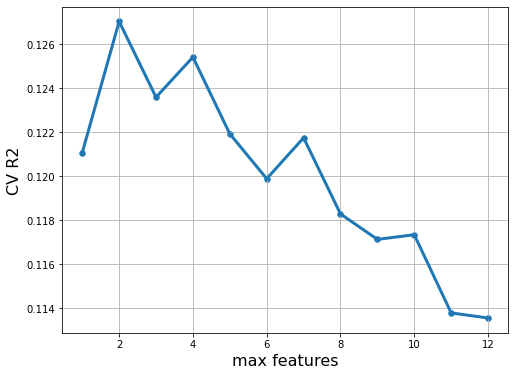

In [79]:
max_features = rf_cv.cv_results_['param_max_features'].data
r2_scores_rf = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, r2_scores_rf, s=30)
plt.plot(max_features, r2_scores_rf, linewidth=3)
plt.grid(True, which='both')

plt.show()

In [80]:
print('Best max_features', rf_cv.best_params_)

rf = rf_cv.best_estimator_

Best max_features {'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [81]:
rf_cv.best_score_

0.1270296826029237

For our random forest model, we observe the highest R2 among our three models with our optimal max_features of 2. So, we will most likely use our random forest model alone as our final model.

Below is the importance scores of all features sorted in descending order. We see which features are most important in determining the UC Admissions Rate for each district in our random forest model.

In [82]:
imp = pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)
imp = imp.sort_values("Importance score", ascending = False)
imp

,Feature,Importance score
3,Teacher Salary-Avg (District),11.5
1,Per Pupil Ratio: Teacher (District),9.9
5,Current Exp of Educ per ADA (Ed Code 41372) (D...,9.8
0,ACT Test Takers # (District),9.4
8,Gen Fund Exp by Activity - 4000-4999 Ancillary...,9.4
7,Total Gen Fund Revenues Per Student (District),9.1
9,Gen Fund Exp by Activity - 1000-1999 Instructi...,9.0
11,Gen Fund Exp by Activity - 3000-3999 Pupil Ser...,8.6
10,Gen Fund Exp by Activity - 7000-7999 General A...,7.9
6,Gen Fund Exp by Object Code - 4000-4999 Books ...,7.3


## Time Series

We want to determine if we can incorporate a time series model to improve our final model, especially since our previous three models yielded very low R2 scores.

In [83]:
# Make new column containing the starting year for each year range
sd_all_cleaned['Year_new'] = sd_all_cleaned['Year'].str[0:4]
sd_all_cleaned['Year_new'] = pd.to_datetime(sd_all_cleaned['Year_new'], infer_datetime_format=True)
sd_all_cleaned

,District Name,Count,Year,Student Count,ACT Test Takers # (District),Per Pupil Ratio: Teacher (District),Avg Years Teaching (District),Teacher Salary-Avg (District),Chronic Absenteeism % (District),Current Exp of Educ per ADA (Ed Code 41372) (District),...,Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Adm,App,Enr,Admission Rate to UC System,Year_new
0,ABC Unified,Adm,2010-2011,205,0.0,49.0,30.0,143614.0,0.0,16108.0,...,16586.0,0.0,10458.0,952.0,1116.0,205.0,270.0,120.0,0.759259,2010-01-01
1,ABC Unified,Adm,2011-2012,207,0.0,49.6,30.0,143774.0,0.0,16216.0,...,16356.0,0.0,10592.0,954.0,1142.0,207.0,281.0,131.0,0.736655,2011-01-01
2,ABC Unified,Adm,2012-2013,183,0.0,48.2,28.0,143186.0,0.0,16010.0,...,16480.0,0.0,10534.0,912.0,1102.0,183.0,258.0,108.0,0.709302,2012-01-01
3,ABC Unified,Adm,2013-2014,200,0.0,49.2,28.0,152394.0,0.0,16818.0,...,17876.0,0.0,11010.0,938.0,1194.0,200.0,275.0,105.0,0.727273,2013-01-01
4,ABC Unified,Adm,2014-2015,182,0.0,48.0,28.0,156382.0,0.0,17850.0,...,18804.0,0.0,11618.0,968.0,1320.0,182.0,271.0,98.0,0.671587,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,Yuba City Unified,Adm,2014-2015,64,0.0,40.0,24.0,128330.0,0.0,18236.0,...,18916.0,152.0,11812.0,888.0,1520.0,64.0,94.0,43.0,0.680851,2014-01-01
2230,Yuba City Unified,Adm,2015-2016,62,402.0,39.6,24.0,132862.0,0.0,19472.0,...,22078.0,186.0,12314.0,1086.0,1586.0,62.0,98.0,31.0,0.632653,2015-01-01
2231,Yuba City Unified,Adm,2016-2017,74,332.0,39.4,24.0,137350.0,36.4,21636.0,...,23672.0,274.0,13470.0,1402.0,1764.0,74.0,111.0,40.0,0.666667,2016-01-01
2232,Yuba City Unified,Adm,2017-2018,56,296.0,36.0,24.0,146336.0,24.6,23652.0,...,23458.0,238.0,14540.0,1342.0,2018.0,56.0,87.0,27.0,0.643678,2017-01-01


In [84]:
def plot_entire_series(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.scatter(x,y, linewidth=1)
    #plt.plot(x, y, linewidth=1, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=1, color="red")
        
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Admission Rate to UC System', fontsize=16)
    plt.show()
    
    return None

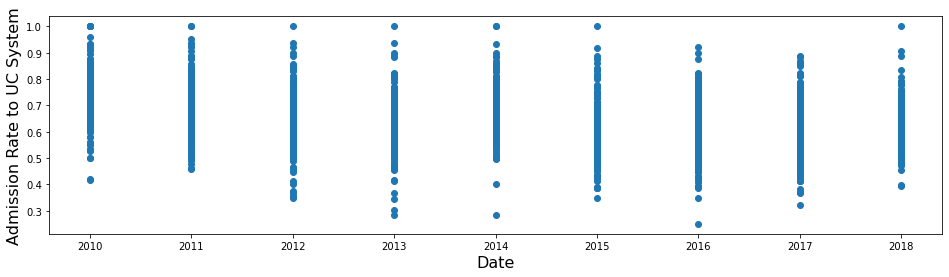

In [85]:
# Make a time series plot to observe potential trend
x = sd_all_cleaned['Year_new'].to_numpy()
y = sd_all_cleaned['Admission Rate to UC System'].to_numpy()

plot_entire_series(x, y)

In [86]:
time_period = list(range(len(sd_all_cleaned)))

series_lm = sd_all_cleaned.copy().drop(columns=['Year','Year_new'])
series_lm = series_lm.rename(columns = {'Admission Rate to UC System': 'AdmissionRateToUCSystem'}, inplace = False)
series_lm['TimePeriod'] = time_period
series_lm.tail()

,District Name,Count,Student Count,ACT Test Takers # (District),Per Pupil Ratio: Teacher (District),Avg Years Teaching (District),Teacher Salary-Avg (District),Chronic Absenteeism % (District),Current Exp of Educ per ADA (Ed Code 41372) (District),Gen Fund Exp by Object Code - 4000-4999 Books & Supplies Per Student (District),Total Gen Fund Revenues Per Student (District),Gen Fund Exp by Activity - 4000-4999 Ancillary Services Per Student # (District),Gen Fund Exp by Activity - 1000-1999 Instruction Per Student # (District),Gen Fund Exp by Activity - 7000-7999 General Administration Per Student # (District),Gen Fund Exp by Activity - 3000-3999 Pupil Services Per Student # (District),Adm,App,Enr,AdmissionRateToUCSystem,TimePeriod
2229,Yuba City Unified,Adm,64,0.0,40.0,24.0,128330.0,0.0,18236.0,1224.0,18916.0,152.0,11812.0,888.0,1520.0,64.0,94.0,43.0,0.680851,2142
2230,Yuba City Unified,Adm,62,402.0,39.6,24.0,132862.0,0.0,19472.0,1322.0,22078.0,186.0,12314.0,1086.0,1586.0,62.0,98.0,31.0,0.632653,2143
2231,Yuba City Unified,Adm,74,332.0,39.4,24.0,137350.0,36.4,21636.0,1288.0,23672.0,274.0,13470.0,1402.0,1764.0,74.0,111.0,40.0,0.666667,2144
2232,Yuba City Unified,Adm,56,296.0,36.0,24.0,146336.0,24.6,23652.0,1622.0,23458.0,238.0,14540.0,1342.0,2018.0,56.0,87.0,27.0,0.643678,2145
2233,Yuba City Unified,Adm,75,232.0,38.6,24.0,151670.0,24.4,25974.0,1586.0,27114.0,266.0,16390.0,1358.0,2228.0,75.0,114.0,41.0,0.657895,2146


In [87]:
# Build a simple linear regressive time series model
import statsmodels.formula.api as smf

lm = smf.ols(formula='AdmissionRateToUCSystem ~ TimePeriod', data=series_lm).fit()

print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     AdmissionRateToUCSystem   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.693
Date:                     Wed, 12 May 2021   Prob (F-statistic):              0.193
Time:                             15:01:39   Log-Likelihood:                 1797.2
No. Observations:                     2147   AIC:                            -3590.
Df Residuals:                         2145   BIC:                            -3579.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

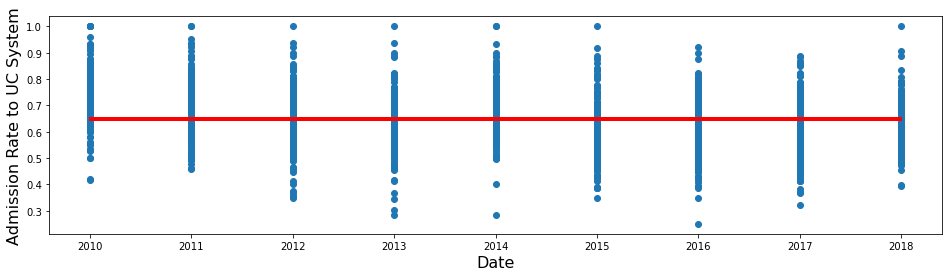

In [88]:
# Draw linear regression line onto time series plot
x = sd_all_cleaned['Year_new'].to_numpy()
y = sd_all_cleaned['Admission Rate to UC System'].to_numpy()
y_pred = lm.predict(series_lm).to_numpy()

plot_entire_series(x, y, red=y_pred)

Despite the long time span, our data does not fit a time series trend, bearing a R-squared of 0.001. Therefore, we will not incorporate this into our blended or final model (only using random forest).

## Blending

Although linear regression and the decision tree regressor yielded much lower R2 scores, there is still a possibility of an improved blended model with a higher score than random forest alone. This is because the two models might include insight not well encompassed in the random forest model.

In [89]:
# Gather predictions of the three models on the validation set
X_blend_val = pd.DataFrame(data = {'val_pred_linreg': linreg_p.predict(sm.add_constant(X_val[X_train_p.columns])),
                     'val_pred_dtr': ccp_dtr.predict(X_val),
                     'val_pred_rf': rf.predict(X_val)})
X_blend_val

,val_pred_linreg,val_pred_dtr,val_pred_rf
7,0.633624,0.608834,0.589683
16,0.623523,0.698060,0.626044
25,0.657130,0.608834,0.635691
34,0.650184,0.608834,0.662579
43,0.615364,0.608834,0.635348
...,...,...,...
2198,0.644490,0.658796,0.663241
2205,0.662171,0.608834,0.617423
2214,0.646749,0.608834,0.600927
2223,0.635865,0.608834,0.594032


In [90]:
# Train linear regression of blended model using linear regression, decision tree and random forest
blending_ols = sm.add_constant(X_blend_val)

blending_res = sm.OLS(y_val, blending_ols).fit()

print(blending_res.summary())

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.091
Model:                                     OLS   Adj. R-squared:                  0.080
Method:                          Least Squares   F-statistic:                     7.919
Date:                         Wed, 12 May 2021   Prob (F-statistic):           4.70e-05
Time:                                 15:01:39   Log-Likelihood:                 227.74
No. Observations:                          240   AIC:                            -447.5
Df Residuals:                              236   BIC:                            -433.6
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Unfortunately, the blended model with all three models yields an R2 score *lower* than random forest alone. We want to remove the linear regression and decision tree predictions from our blended model because they show up as insignificant (p > 0.05).

In [91]:
# Train linear regression of blended model using linear regression, decision tree and random forest
X_blend_val2 = X_blend_val.drop(['val_pred_linreg', 'val_pred_dtr'], axis = 1)
blending_ols2 = sm.add_constant(X_blend_val2)

blending_res2 = sm.OLS(y_val, blending_ols2).fit()

print(blending_res2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Admission Rate to UC System   R-squared:                       0.083
Model:                                     OLS   Adj. R-squared:                  0.079
Method:                          Least Squares   F-statistic:                     21.55
Date:                         Wed, 12 May 2021   Prob (F-statistic):           5.69e-06
Time:                                 15:01:39   Log-Likelihood:                 226.63
No. Observations:                          240   AIC:                            -449.3
Df Residuals:                              238   BIC:                            -442.3
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Although the R2 dropped, this blended model is more reliable because the previously high R2 was due to insignificant models that were specific to the training set. This model should perform better on the test set.

In [92]:
# Add the predictions of the blended model to the dataframe
val_pred_blended = blending_res.predict(sm.add_constant(X_blend_val))
X_blend_val['val_pred_blended']= val_pred_blended

X_blend_val

,val_pred_linreg,val_pred_dtr,val_pred_rf,val_pred_blended
7,0.633624,0.608834,0.589683,0.577685
16,0.623523,0.698060,0.626044,0.653750
25,0.657130,0.608834,0.635691,0.624457
34,0.650184,0.608834,0.662579,0.650363
43,0.615364,0.608834,0.635348,0.621235
...,...,...,...,...
2198,0.644490,0.658796,0.663241,0.673623
2205,0.662171,0.608834,0.617423,0.606879
2214,0.646749,0.608834,0.600927,0.589625
2223,0.635865,0.608834,0.594032,0.582107


## Test Performance

The blended model might perform differently on the test set.

In [93]:
# Get predictions for linear regress, decision tree, random forest on the test set
X_blend_test = pd.DataFrame(data = {'val_pred_linreg': linreg_p.predict(sm.add_constant(X_test[X_train_p.columns])),
                     'val_pred_dtr': ccp_dtr.predict(X_test),
                     'val_pred_rf': rf.predict(X_test)})
X_blend_test

,val_pred_linreg,val_pred_dtr,val_pred_rf
8,0.630074,0.608834,0.582759
26,0.654605,0.608834,0.616496
35,0.653596,0.608834,0.625848
44,0.612098,0.608834,0.625592
53,0.654471,0.608834,0.587694
...,...,...,...
2199,0.642684,0.658796,0.653733
2206,0.662912,0.608834,0.630168
2215,0.650959,0.608834,0.587809
2224,0.636935,0.608834,0.590910


In [94]:
print('Blended Model MAE:', MAE(blending_res, sm.add_constant(X_blend_test), y_test), '\n')
print('Blended Model RMSE:', RMSE(blending_res, sm.add_constant(X_blend_test), y_test), '\n')
print('Blended Model OSR2:', OSR2(blending_res, sm.add_constant(X_blend_test), y_test, y_train), '\n')

Blended Model MAE: 0.06686308054211872 

Blended Model RMSE: 0.08688349902376523 

Blended Model OSR2: 0.02505428589669001 



As expected, the first blended model performed worse than the random forest model alone on the test set. We will now use our final blended model with only random forest.

In [95]:
# Get predictions for random forest on the test set
X_blend_test2 = pd.DataFrame(data = {'val_pred_rf': rf.predict(X_test)})
X_blend_test2

,val_pred_rf
0,0.582759
1,0.616496
2,0.625848
3,0.625592
4,0.587694
...,...
231,0.653733
232,0.630168
233,0.587809
234,0.590910


In [96]:
print('Baseline MAE:', np.mean(np.abs(y_test - np.mean(y_train))))
print('Linear Regression MAE:', MAE(linreg_p, sm.add_constant(X_test[X_train_p.columns]), y_test))
print('Regression Tree MAE:', MAE(ccp_dtr, X_test, y_test))
print('Random Forest MAE:', MAE(rf, X_test, y_test))
print('Blended Model MAE:', MAE(blending_res2, sm.add_constant(X_blend_test2), y_test), '\n')

print('Baseline RMSE:', np.sqrt(np.mean((y_test - np.mean(y_train))**2)))
print('Linear Regression RMSE:', RMSE(linreg_p, sm.add_constant(X_test[X_train_p.columns]), y_test))
print('Regression Tree RMSE:', RMSE(ccp_dtr, X_test, y_test))
print('Random Forest RMSE:', RMSE(rf, X_test, y_test))
print('Blended Model RMSE:', RMSE(blending_res2, sm.add_constant(X_blend_test2), y_test), '\n')

print('Linear Regression OSR2:', OSR2(linreg_p, sm.add_constant(X_test[X_train_p.columns]), y_test, y_train))
print('Regression Tree OSR2:', OSR2(ccp_dtr, X_test, y_test, y_train))
print('Random Forest OSR2:', OSR2(rf, X_test, y_test, y_train))
print('Blended Model OSR2:', OSR2(blending_res2, sm.add_constant(X_blend_test2), y_test, y_train), '\n')

Baseline MAE: 0.06867056140947875
Linear Regression MAE: 0.06798468632447917
Regression Tree MAE: 0.06400386900143737
Random Forest MAE: 0.06406630206852267
Blended Model MAE: 0.09098084993931609 

Baseline RMSE: 0.08799278946978878
Linear Regression RMSE: 0.08782124484865726
Regression Tree RMSE: 0.08423867666145476
Random Forest RMSE: 0.08426492808290466
Blended Model RMSE: 0.10753554490504622 

Linear Regression OSR2: 0.0038952602010740023
Regression Tree OSR2: 0.08350753153017043
Random Forest OSR2: 0.08293622676125567
Blended Model OSR2: 0.8417885485436253 



Our final blended model has a high OSR2 of 0.84.